In [1]:
from tensorflow import keras

In [2]:
keras.__version__

'2.2.4-tf'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mnist = pd.read_csv('train.csv')

X, y = mnist.iloc[:,1:].values, mnist.iloc[:,0].values


In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [5]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [6]:
X.shape

(42000, 784)

In [7]:
train_images, test_images, train_labels, test_labels = X[:32000], X[32000:], y[:32000], y[32000:]
train_images = train_images.astype('float32') / 255

test_images = test_images.astype('float32') / 255

In [8]:
train_images.shape

(32000, 784)

In [9]:
test_images.shape

(10000, 784)

In [10]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)

test_labels = to_categorical(test_labels)

In [11]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Train on 32000 samples
Epoch 1/5
32000/32000 [==============================] - 2s 56us/sample - loss: 0.3382 - accuracy: 0.9019
Epoch 2/5
32000/32000 [==============================] - 1s 39us/sample - loss: 0.1449 - accuracy: 0.9562
Epoch 3/5
32000/32000 [==============================] - 1s 40us/sample - loss: 0.0960 - accuracy: 0.9724
Epoch 4/5
32000/32000 [==============================] - 1s 40us/sample - loss: 0.0678 - accuracy: 0.9805
Epoch 5/5
32000/32000 [==============================] - 1s 40us/sample - loss: 0.0512 - accuracy: 0.9853


In [12]:

test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [13]:
test_acc

0.9729

In [14]:
test_images.shape

(10000, 784)

In [15]:
test_images[0]
test_labels[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [16]:
network.predict_classes(test_images)
#network.predict(test_images[0])

array([6, 7, 0, ..., 7, 6, 9])

In [39]:
somedigit = test_images[300].reshape(28,28)
somedigit_label = test_labels[300]

the SOME digit is the number:  4


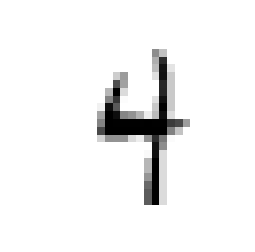

In [40]:
plt.imshow(somedigit, cmap='binary')
plt.axis('off');

print(f'the SOME digit is the number:  {somedigit_label.argmax()}')

In [41]:
test_predictions = network.predict_classes(test_images)

In [51]:
test_predictions

array([6, 7, 0, ..., 7, 6, 9])

In [54]:
test_label_lst = list()
for i in range(len(test_labels)):
    test_label_lst.append(test_labels[i].argmax())

In [90]:
data ={'id':range(len(test_labels)),'test_label':test_label_lst,'prediction':test_predictions}
df = pd.DataFrame(data)

In [91]:
def check(row):
    if row['test_label'] == row['prediction']:
        return 0
    else:
        return 1

In [92]:
df['error'] = df.apply(lambda x: check(x), axis=1)

In [93]:
errors = df[df['error']==1]

In [94]:
errors

,id,test_label,prediction,error
54,54,5,3,1
82,82,0,6,1
153,153,7,8,1
166,166,5,3,1
288,288,6,7,1
...,...,...,...,...
9833,9833,7,3,1
9884,9884,3,0,1
9892,9892,7,2,1
9923,9923,1,9,1


In [103]:
# numbers had most erros
errors['test_label'].value_counts()

5    51
9    42
4    31
3    30
7    26
6    22
2    21
8    19
0    18
1    11
Name: test_label, dtype: int64

In [117]:
pd.options.display.max_rows = 70
pd.pivot_table(errors,index=['test_label','prediction'],values='error',aggfunc='sum')


error
test_label prediction       
0          2               3
           3               1
           5               1
           6               4
           8               7
           9               2
1          2               3
           4               1
           7               1
           8               5
           9               1
2          3               5
           6               3
           7               6
           8               5
           9               2
3          0               1
           1               4
           2               6
           5               4
           7               5
           8               6
           9               4
4          1               7
           2               2
           5               1
           6               2
           8               3
           9              16
5          0               4
           1               4
           2               1
           3              16
           4               2
           6               5
           8              13
           9               6
6          0               5
           1               3
           2               3
           4               3
           5               4
           7               2
           8               2
7          0               1
           1               2
           2              10
           3               2
           4               3
           5               2
           8               3
           9               3
8          0               2
           1              10
           3               3
           4               1
           5               2
           9               1
9          0               4
           1               3
           2               1
           3               9
           4              10
           5               3
           7               7
           8               5

In [ ]:
mnist_test = pd.read_csv('test.csv')

In [ ]:
X_t = mnist_test.values

In [ ]:
X_t = X_t.astype('float32')/255

In [ ]:
X_t.shape

In [ ]:
network.predict_classes(X_t)

In [ ]:
kaggle_predictions = network.predict_classes(X_t)

In [ ]:
imageid = list(range(1,len(kaggle_predictions)+1))

data = {'ImageId': imageid,'Label': kaggle_predictions}

In [ ]:
pd.DataFrame(data).to_csv('submission_CNN_Chollet.csv',index=False)